# 설정

In [1]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 출력을 동일하게 하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

선형 회귀 모델을 만들기 전에 새로운 주택 데이터셋을 소개한다. 이 데이터셋은 1978년 해리슨<sup>D. Harrison</sup>과 루빈펠드<sup>D. L. Rubinfeld</sup>가 수집한 보스턴 교외 지역의 주택 정보를 담고 있다. 새로운 데이터셋을 만나게 되면 간단한 그래프를 그려서 데이터를 탐색하는 것이 작업 대상을 이해하는 데 도움이 된다.

## 데이터프레임으로 주택 데이터셋 읽기

주택 데이터셋은 506개의 샘플이 있으며 특성은 다음과 같다.

사이킷런은 보스턴 주택 가격 데이터 세트를 <code>load_boston()</code>을 통해 제공한다. 해당 데이터 세트를 불러온 뒤 DataFrame으로 변경하겠다.

<ul>
    <li><b>CRIM</b>: 도시의 인당 범죄율</li>
    <li><b>ZN</b>: 25,000평방 피트가 넘는 주택 비율</li>
    <li><b>INDUS</b>: 도시에서 소매 업종이 아닌 지역 비율</li>
    <li><b>CHAS</b>: 찰스 강 인접 여부(강 주변=1, 그 외=0)</li>
    <li><b>NOX</b>: 일산화질소 농도(10ppm당)</li>
    <li><b>RM</b>: 주택의 평균 방 개수</li>
    <li><b>AGE</b>: 1940년 이전에 지어진 자가 주택 비율</li>
    <li><b>DIS</b>: 다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리</li>
    <li><b>RAD</b>: 방사형으로 뻗은 고속도로까지 접근성 지수</li>
    <li><b>TAX</b>: 10만 달러당 재산세율</li>
    <li><b>PTRATIO</b>: 도시의 학생-교사 비율</li>
    <li><b>B</b>: 지역의 흑인 거주 비율</li>
    <li><b>LSTAT</b>: 저소득 계층의 비율</li>
    <li><b>MEDV</b>: 자가 주택의 중간 가격(1,000달러 단위)</li>
</ul>

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다. <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model" target='blank'>https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model</a>에서 사이킷런이 지원하는 다양한 선형 모듈을 확인할 수 있다. 이들 선형 모델 중 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 LinearRegression을 이용해 보스턴 주택 가격 예측 회귀를 구현할 것이다. 그전에 먼저 LinearRegression 클래스에 대해 살펴보겠다.

In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


데이터 세트 피처의 Null 값은 없으며 모두 float 형이다.

## 데이터셋의 중요 특징 시각화

<b>탐색적 데이터 분석</b><sup>Exploratory Data Analysis, EDA</sup>은 머신 러닝 모델을 훈련하기 전에 첫 번째로 수행할 중요하고 권장되는 단계다. 이 절 나머지 부분에서 EDA 그래픽 도구 중에서 간단하지만 유용한 기법들을 사용해 보겠다. 이런 도구는 이상치를 감지하고 데이터 분포를 시각화하거나 특성 간의 관계를 나타내는 데 도움이 된다.

먼저 <b>산점도 행렬</b><sup>scatterplot matrix</sup>을 그려서 데이터셋에 있는 특성 간의 상관관계를 한 번에 시각화해 보겠다. Seaborn 라이브러리의 <code>pairplot()</code> 함수를 사용하여 산점도 행렬을 그릴 수 있다. Seaborn은 통계 그래프를 그릴 수 있는 맷플롯립 기반의 파이썬 라이브러리다.

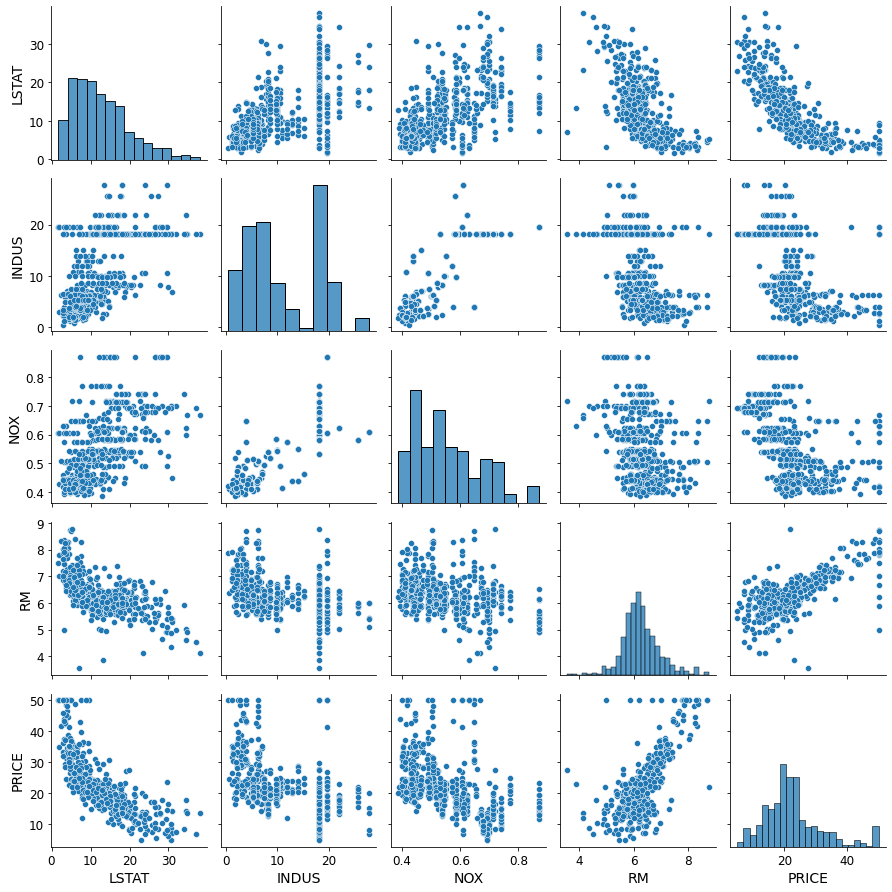

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PRICE']
sns.pairplot(bostonDF[cols], height=2.5)
plt.tight_layout()
plt.show()

산점도 행렬을 사용하면 데이터가 어떻게 분포되어 있는지, 이상치를 포함하고 있는지 빠르게 확인할 수 있다. 예를 들어 RM과 주택 가격인 PRICE 사이에 선형적인 관계가 있다는 것을 알 수 있다(네 번째 행의 다섯 번째 열). 또 오른쪽 맨 아래에서 PRICE의 히스토그램을 볼 수 있다. 이 데이터는 일부 이상치가 있지만 정규 분포 형태를 띠고 있다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: green"><strong>NOTE_</strong></span>일반적으로 알고 있는 것과 달리 선형 회귀 모델을 훈련할 때 특성과 타깃이 정규 분포일 필요는 없다. 정규 분포 가정은 특정 통계와 가설 검증에 필요하다.
</div>

다음으로 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보겠다. 'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'의 총 8개 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다. Seaborn의 <code>regplot()</code> API는 X, Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다. <code>matplotlib.subplots()</code>를 이용해 각 ax마다 칼럼과 PRICE의 관계를 표현한다.

matplotlib의 <code>subplots()</code>은 여러 개의 그래프를 한번에 표현하기 위해 자주 사용된다. 인자로 입력되는 ncols는 열 방향으로 위치할 그래프의 개수이며, nrows는 행 방향으로 위치할 그래프의 개수다. ncols=4, nrows=2이면 2개의 행과 4개의 열을 가진 총 8개의 그래프를 행, 열 방향으로 그릴 수 있다.

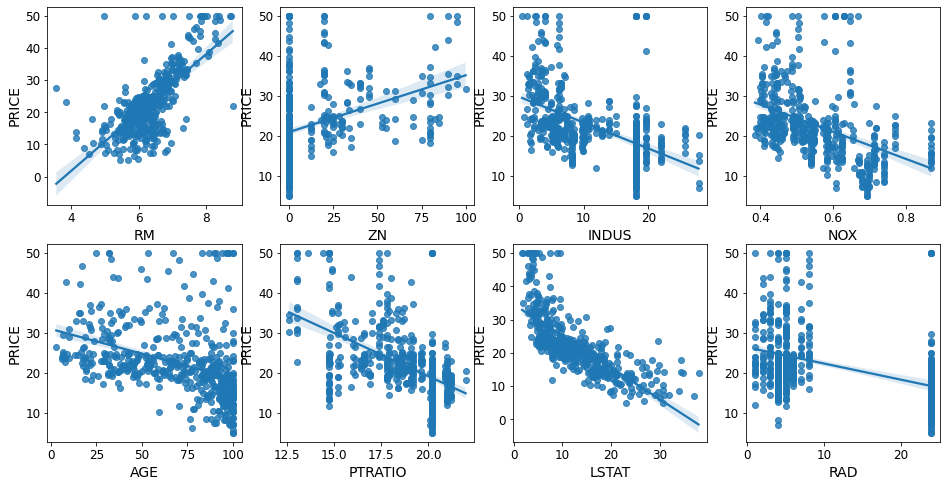

In [5]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # Seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다. RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가하는 모습을 확연히 보여준다. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다. LSTAT이 적을 수록 PRICE가 증가하는 모습이 확연히 나타난다.

## 상관관계 행렬을 사용한 분석

이전 절에서 히스토그램과 산점도로 주택 데이터셋 특성들의 분포를 그려 보았다. 다음으로 <b>상관관계 행렬</b><sup>correlation matrix</sup>을 만들어 변수 간의 선형 관계를 정량화하고 요약해 보겠다. 상관관계 행렬은 <b>공분산 행렬</b><sup>covariance matrix</sup>과 밀접하게 관련되어 있다. 직관적으로 생각하면 상관관계 행렬을 스케일 조정된 공분산 행렬로 생각할 수 있다. 사실 특성이 표준화되어 있으면 상관관계 행렬과 공분산 행렬이 같다.

상관관계 행렬은 <b>피어슨의 상관관계 계수</b><sup>Pearson product-moment correlation coefficient</sup>를 포함하고 있는 정방 행렬이다(종종 피어슨의 r이라고 말한다). 이 계수는 특성 사이의 선형 의존성을 측정한다. 상관관계 계수의 범위는 -1\~1이다. r=1이면 두 특성이 완벽한 양의 상관관계를 가진다. r=0이면 아무런 상관관계가 없다. r=-1이면 완벽한 음의 상관관계를 가진다. 앞서 언급한 것처럼 피어슨의 상관관계 계수는 단순히 두 특성 x와 y 사이의 공분산(분자)을 표준편차의 곱(분모)으로 나눈 것이다.

$$
r = \frac{\sum_{i=1}^n[(x^{(i)} - \mu_x)(y^{(i)} - \mu_y)]}{\sqrt{\sum_{i=1}^n(x^{(i)} - \mu_x)^2}\sqrt{\sum_{i=1}^n(y^{(i)} - \mu_y)^2}} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
$$

여기서 $\mu$는 해당 특성의 샘플 평균이고, $\sigma_{xy}$는 특성 $x$와 $y$의 공분산이다. $\sigma_x$와 $\sigma_y$는 특성의 표준 편차다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: green"><strong>NOTE_</strong></span>표준화된 특성 간의 공분산은 사실 선형 상관관계 계수와 같다. 이를 확인하기 위해 먼저 특성 $x$와 $y$를 표준화해서 z-점수를 계산해 보자. 이를 각각 $x'$와 $y'$라고 하겠다.
    $$
    x' = \frac{x-\mu_x}{\sigma_x},\,y' = \frac{y - \mu_y}{\sigma_y}
    $$
    두 특성 사이의 (모집단) 공분산은 다음과 같이 계산한다.
    $$
    \sigma_{xy} = \frac{1}{n}\sum_{i=1}^n(x^{(i)} - \mu_x)(y^{(i)} - \mu_y)
    $$
    표준화를 하면 특성의 평균이 0이 되므로 전처리된 특성 사이의 공분산은 다음과 같이 계산할 수 있다.
    $$
    \sigma_{xy}' = \frac{1}{n}\sum_{i=1}^n(x'-0)(y'-0)
    $$
    변수를 치환하면 다음 식을 얻는다.
    $$
    \frac{1}{n}\sum_{i=1}^n(\frac{x-\mu_x}{\sigma_x})(\frac{y-\mu_y}{\sigma_y})
    $$
    $$
    \frac{1}{n\cdot\sigma_x\cdot\sigma_y}\sum_{i=1}^n(x^{(i)} - \mu_x)(y^{(i)} - \mu_y)
    $$
    결국 이 식은 다음과 같이 쓸 수 있다.
    $$
    \sigma_{xy}' = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
    $$
</div>

다음 예제에서는 앞서 산점도 행렬로 그렸던 8개의 특성에 'PRICE' 특성을 추가하여 넘파이 <code>corrcoef()</code> 함수를 사용해 보겠다. Seaborn의 <code>heatmap()</code> 함수를 사용하여 상관관계 행렬을 히트맵으로 나타내겠다.

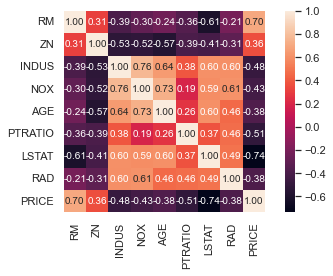

In [6]:
import numpy as np
cm = np.corrcoef(bostonDF[lm_features + ['PRICE']].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=lm_features + ['PRICE'],
                 xticklabels=lm_features + ['PRICE']
                 )
plt.tight_layout()
plt.show()

결과 그래프에서 볼 수 있듯이 상관관계 행렬은 선형 상관관계를 바탕으로 특성을 선택하는 데 유용한 정보를 요약해 준다.

선형 회귀 모델을 훈련하려면 타깃 변수 PRICE와 상관관계가 높은 특성이 좋다. 이 상관관계 행렬을 살펴보면 타깃 변수 PRICE가 LSTAT와 상관관계가 높다(-0.74). 산점도 행렬에서 보았던 것을 떠올리면 LSTAT와 PRICE 사이 관계는 확실히 비선형적이다. 한편 RM과 PRICE 사이의 상관관계도 비교적 높다(0.7). 산점도 행렬에서 보면 이 두 변수가 선형 관계를 가지므로 다음 절에서 간단한 선형 회귀 개념을 소개할 때 RM이 선택하기 좋은 특성으로 보인다.

## 최소 제곱 선형 회귀 모델 구현

선형 회귀는 훈련 데이터의 샘플 포인터에 가장 잘 맞는 직선을 찾는 것으로 이해할 수 있다고 했다. 이어지는 절에서 <b>최소 제곱법</b><sup>Ordinary Least Squares, OLS</sup>을 사용하여 가장 잘 맞는 모델을 학습해 보겠다(이따금 <b>선형 최소 제곱법</b><sup>linear least squares</sup>이라고도 한다. 샘플 포인트까지 수직 거리의 제곱 합(잔차 또는 오차)을 최소화하는 선형 회귀 직선의 모델 파라미터를 추정하는 방법이다.

### 경사 하강법으로 회귀 모델의 파라미터 구하기

다음은 우리가 최적화할 모델의 비용 함수 $J(\cdot)$인 <b>제곱 오차합</b><sup>Sum of Squared Errors, SSE</sup>으로 OLS에서 사용할 비용 함수와 같다.

$$
J(w) = \frac{1}{2}\sum_{i=1}^n(y^{(i)} - \hat{y}^{(i)})^2
$$

여기서 $\hat{y}$는 예측 값으로 $\hat{y} = w^Tx$이다($\frac{1}{2}$을 곱한 것은 경사 하강법의 업데이트 공식을 간단하게 유도하기ㅣ 위해서이다). 근본적으로 OLS 회귀는 단위 계단 함수가 없는 아달린으로 해석할 수 있다. 클래스 레이블 -1이나 1 대신 연속적인 타깃 값을 얻는다.

In [22]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

LinearRegressionGD를 실행해 보기 위해 주택 데이터셋에서 RM(방 개수) 변수를 특성으로 사용하여 PRICE(주택 가격)를 예측하는 모델을 훈련시켜 보겠다. 또 경사 하강법 알고리즘이 잘 수렴하도록 특성을 표준화 전처리하겠다. 코드는 다음과 같다.

In [23]:
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

<code>np.newaxis</code>와 <code>flatten()</code>을 사용하여 y_std를 계산한다. 사이킷런에 있는 대부분의 변환기는 데이터가 2차원 배열로 저장되어 있다고 기대한다. 앞 코드에서 <code>y[:, np.newaxis]</codE>에 사용된 <code>np.newaxis</code>는 배열에 새로운 차원을 추가한다. StandardScaler가 스케일 조정된 결과를 반환하면 <code>flatten()</code> 메서드를 사용하여 원래 1차원 배열 형태로 되돌렸다.

경사 하강법 같은 최적화 알고리즘을 사용할 때 훈련 데이터셋을 반복하는 에포크의 함수로 비용을 그래프로 그려 보는 것이 좋다. 알고리즘이 비용 함수의 최솟값으로 수렴하는지 확인할 수 있다(여기서는 전역 최솟값<sup>global cost minimum</sup>이다<sup><a id="a01" href="#p01">[1]</a></sup>).

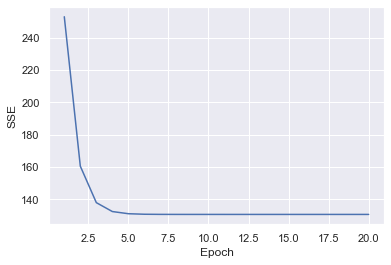

In [25]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

위 그림에서 볼 수 있듯이 경사 하강법 알고리즘은 다섯 번째 에포크에서 수렴했다.

그다음 이 선형 회귀 모델이 훈련 데이터에 얼마나 잘 맞는지 그려 보자. 이를 위해서 훈련 샘플의 산점도와 회귀 직선을 그려 주는 헬퍼<sup>helper</sup> 함수를 만들겠다.

In [36]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

이제 <code>lin_regplot()</code> 함수를 사용하여 주택 가격과 방 개수에 관한 그래프를 그려 보자.

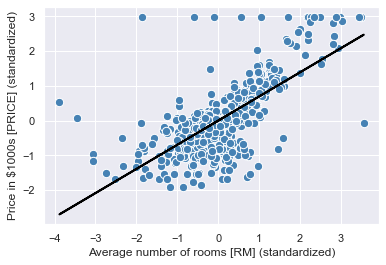

In [37]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [PRICE] (standardized)')
plt.show()

위 그림에서 볼 수 있듯이 이 선형 회귀 직선은 방 개수가 늘어남에 따라 주택 가격이 증가하는 일반적인 경향을 반영하고 있다.

이런 경향은 매우 직관적으로 보이지만, 이 데이터는 방 개수가 주택 가격을 잘 설명하지 못하는 경우도 많다는 것을 알려 준다. 흥미롭게도 y=3인 직선에 여러 데이터 포인트가 늘어서 있다. 이 지점에서 초과되는 가격을 잘라 냈다는 것을 의미한다. 어떤 애플리케이션에서는 예측된 출력 값을 원본 스케일로 복원하여 제공해야 한다. 예측한 가격을 1,000달러 단위 가격으로 되돌리려면 간단하게 StandardScaler의 <code>inverse_transform()</code> 메서드를 호출하면 된다.<sup><a id="a02" href="#p02">[2]</a></sup>

In [40]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1, 1)))

$1,000 단위 가격: 10.840


이 코드에서는 앞서 훈련한 선형 회귀 모델을 사용하여 다섯 개의 방을 가진 주택 가격을 예측했다. 모델은 이런 주택 가격을 1만 840달러로 산정했다.

표준화 처리된 변수를 사용할 때 기술적으로는 절편을 업데이트할 필요가 없다. 이 경우에는 y축 절편이 항상 0이기 때문이다.<sup><a id="a03" href="#p03">[3]</a></sup> 가중치를 출력해 보면 간단하게 확인할 수 있다.

In [44]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


## LinearRegression 클래스 - Ordinary Least Squares

지금까지 회귀 분석을 위한 모델을 구현했다. 실전에서는 더 효율적인 구현이 필요하다. 사이킷런의 많은 회귀 추정기는 LIBLINEAR 라이브러리와 고수준 최적화 알고리즘을 사용한다.

LinearRegression 클래스는 예측값과 실제 값의 RSS<sup>Residual Sum of Squares</sup>를 최소화해 OLS<sup>Ordinary Least Squares</sup> 추정 방식으로 구현한 클래스다. LinearRegression 클래스는 <code>fit()</code> 메서드로 X, y 배열을 받으면 회귀 계수(Coefficients)인 $\theta$를 coef_ 속성에 저장한다.

<code>class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
</code>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax" rowspan="2">입력 파라미터</th>
    <th class="tg-1wig"><span style="font-weight:bold">fit_intercept</span>: 불린 값으로, 디폴트는 True이다. Intercept(절편) 값을 계산할 것인지 말지를 지정한다. 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.</th>
  </tr>
  <tr>
    <th class="tg-0lax"><span style="font-weight:bold">normalize</span>: 불린 값으로 디폴트는 False이다. fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-1wig" rowspan="2">속성</td>
    <td class="tg-0lax"><span style="font-weight:bold">coef_</span>: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수).</td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-weight:bold">intercept_</span>: intercept 값</td>
  </tr>
</tbody>
</table>

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중 공선성<sup>multi-collinearity</sup> 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있다. 다음으로 예측된 회귀 모델을 평가하는 방법에 대해 알아보겠다.

### 회귀 평가 지표

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다. 실제 값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄된다(데이터 두 개의 예측 차이가 하나는 -3, 다른 하나는 +3일 경우 단순히 더하면 오류가 0으로 나타나기 때문에 정확한 지표가 될 수 없다). 이 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.

일반적으로 회귀의 성능을 평가하는 지표는 다음과 같다.

$\text{MAE}$: Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것이다.
$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^n|y^{(i)} - \hat{y}^{(i)}|
$$

$\text{MSE}$: Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것이다.
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - \hat{y}^{(i)})^2
$$

$\text{RMSE}$: MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)이다.
$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n(y^{(i)} - \hat{y}^{(i)})^2}
$$

$R^2$: 분산 기반으로 예측 성능을 평가한다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.
$$
R^2 = \frac{\text{예측값 Variance}}{\text{실제값 Variance}}
$$

이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용한다.

사이킷런은 아쉽게도 RMSE를 제공하지 않는다. RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 한다. 다음은 각 평가 방법에 대한 사이킷런의 API 및 <code>cross_val_score()</code>나 <code>GridSearchCV()</code>에서 평가 시 사용되는 scoring 파라미터의 적용 값이다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">평가 방법</th>
    <th class="tg-1wig">사이킷런 평가 지표 API</th>
    <th class="tg-1wig">Scoring 함수 적용 값</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-1wig">$\text{MAE}$</td>
      <td class="tg-0lax"><code>metrics.mean_absolute_error</code></td>
    <td class="tg-0lax">'neg_mean_absolute_error'</td>
  </tr>
  <tr>
    <td class="tg-1wig">$\text{MSE}$</td>
    <td class="tg-0lax"><code>metrics.mean_squared_error</td>
    <td class="tg-0lax">'neg_mean_squared_error'</td>
  </tr>
  <tr>
    <td class="tg-1wig">$\text{R}^2$</td>
    <td class="tg-0lax"><code>metrics.r2_score</td>
    <td class="tg-0lax">'r2'</td>
  </tr>
</tbody>
</table>

<code>cross_val_score()</code>, <code>GridSearchCV()</code>와 같은 Scoring 함수에 회귀 평가 지표를 적용할 때 한 가지 유의할 점이 있다. 예를 들어, MAE의 scoring 파라미터 값을 살펴보면 'neg_mean_absolute_error'와 같이 'neg_'라는 접두어가 붙어 있다. 이는 Negative(음수) 값을 가진다는 의미인데, MAE는 절댓값의 합이기 때문에 음수가 될 수 없다. Scoring 함수에 'neg_mean_squared_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다(특히 <code>GridSearchCV()</code>의 경우 가장 좋은 Evaluation 값을 가지는 하이퍼 파라미터로 Estimator를 학습까지 자동으로 시킬 수 있다). 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요하다.

따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다. 예를 들어 10 > 1이지만 음수를 곱하면 -1 > -10이 된다. <code>metrics.mean_absolute_error()</code>와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환한다. 하지만 Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 x <code>metrics.mean_absolute_error()</code>이니 주의가 필요하다.

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들겠다. <code>train_test_split()</code>을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행한다. 그리고 metrics 모듈의 <code>mean_squared_error()</code>와 <code>r2_score()</code> API를 이용해 MSE와 R2 Score를 측정하겠다.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


LinearRegression으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값을 보겠다. 절편은 LinearRegression 객체의 intercept_ 속성에, 회귀 계수는 coef_ 속성에 값이 저장돼있다.

In [50]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164705
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해 보겠다. 이를 위해 판다스 Series의 <code>sort_values()</code> 함수를 이용한다.

In [51]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보인다. 차츰 최적화를 수행하면서 피처 coefficients의 변화도 같이 살펴보겠다.

이번에는 5개의 폴드 세트에서 <code>cross_val_score()</code>를 이용해 교차 검증으로 MSE와 RMSE를 측정해 보겠다. 사이킷런은 <code>cross_val_score()</code>를 이용할 텐데, RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 한다. <code>cross_val_score()</code>의 인자로 scoring='neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수 값이다. 앞에서도 설명했듯이 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인 데 반해, 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이다. 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 scoring='neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환한다. 따라서 <code>cross_val_score()</code>에서 반환된 값에 다시 -1을 곱해야 앙의 값인 원래 모델에서 계산된 MSE 값이 된다. 이렇게 다시 변환된 MSE 값에 넘파이의 <code>sqrt()</code> 함수를 적용해 RMSE를 구할 수 있다.

In [54]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


5개 폴드 세트에 대해서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.829가 나왔다. <code>cross_val_score(scoring="neg_mean_squared_error")로 반환된 값을 확인해 보면 모두 음수임을 알 수 있다.

앞서 2.4.1절에서 직접 LinearRegressionGD 클래스를 구현했고 이 모델을 이용해 RM과 PRICE 사이의 선형성을 확인했다. 같은 특성에 대해서 사이킷런의 LinearRegression 클래스로 나타내보자.

In [74]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


이 코드를 실행하면 알 수 있지만 사이킷런의 LinearRegression을 표준화되지 않은 RM과 PRICE 변수에 훈련시키면 모델의 가중치가 달라진다. RM에 대한 PRICE 그래프를 그려서 직접 만든 경사 하강법 구현과 비교해 보자.

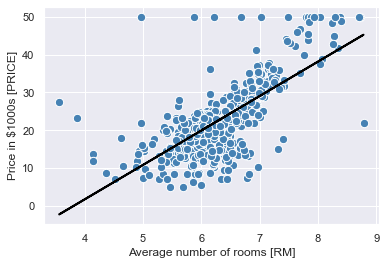

In [75]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [PRICE]')
plt.show()

# RANSAC을 사용하여 안정된 회귀 모델 훈련

선형 회귀 모델은 이상치<sup>outlier</sup>에 크게 영향을 받을 수 있다. 어떤 상황에서는 데이터의 아주 작은 일부분이 추정 모델의 가중치에 큰 영향을 끼친다. 이상치를 감지하는 데 사용할 수 있는 통계적 테스트가 많지만 다른 챕터에서 다루기로 한다. 이상치를 제거하려면 항상 해당 분야의 지식뿐만 아니라 데이터 과학자로서 식견도 항상 필요하다.

이상치를 제거하는 방식 대신 <b>RANSAC</b><sup>RANdom SAmple Consensus</sup> 알고리즘을 사용하는 안정된 회귀 모델에 대해 알아보겠다. 이 알고리즘은 정상치<sup>inlier</sup>라는 일부 데이터로 회귀 모델을 훈련한다.

반복적인 RANSAC 알고리즘을 다음과 같이 정리할 수 있다.

<ol>
    <li>랜덤하게 일부 샘플을 정상치로 선택하여 모델을 훈련한다.</li>
    <li>훈련된 모델에서 다른 모든 포인트를 테스트한다. 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가한다.</li>
    <li>모든 정상치를 사용하여 모델을 다시 훈련한다.</li>
    <li>훈련된 모델과 정상치 간의 오차를 추정한다.</li>
    <li>성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘을 종료한다. 그렇지 않으면 단계 1로 돌아간다.</li>
</ol>

사이킷런의 RANSACRegressor를 사용하여 RANSAC 알고리즘에 선형 모델을 적용해 보겠다.

In [56]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

RANSACRegressor의 최대 반복 횟수를 100으로 설정했다. min_samples=50으로 하여 랜덤하게 선택할 샘플의 최소 개수를 50개로 지정했다.<sup><a id="a04" href="#p04">[4]</a></sup> loss 매개변수의 매개변수로 'absolute_loss'를 사용하면 알고리즘이 학습한 직선과 샘플 포인트 간 수직 거리의 절댓값을 계산한다. residual_threshold 매개변수를 5.0으로 설정하여 학습한 직선과 수직 거리가 5 이내에 있는 정상 샘플만 포함시킨다. 이 데이터셋에서 잘 맞는 값을 선택했다.

사이킷런에서 정상치 임계 값의 기본값은 <b>MAD</b> 추정이다. MAD는 타깃 값 y의 <b>중앙값 절대 편차</b><sup>Median Absolute Deviation</sup>를 의미한다.<sup><a id="a05" href="#p05">[5]</a></sup> 적절한 정상치 임계 값은 문제에 따라 다르다. 이것이 RANSAC의 단점 중 하나다. 최근에 좋은 정상치 임계 값을 자동으로 선택하기 위한 여러 가지 방법이 개발되었다.

RANSAC 모델을 훈련한 후 학습된 RANSAC-선형 회귀 모델에서 정상치와 이상치를 얻을 수 있다. 이를 선형 모델과 함께 그려 보자.

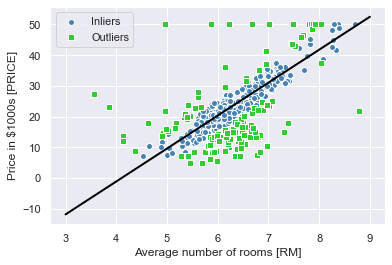

In [68]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [PRICE]')
plt.legend(loc='upper left')
plt.show()

위 산점도에서 볼 수 있듯이 동그라미로 표시된 정상치에 선형 회귀 모델이 훈련되었다.

다음 코드로 이 모델의 기울기와 절편을 출력하면 이전 절에서 RANSAC을 사용하지 않고 구한 직선과 조금 다른 것을 알 수 있다.

In [72]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


RANSAC을 사용하면 데이터셋에 있는 이상치의 잠재적인 영향을 감소시킨다. 하지만 이 방법이 본 적 없는 데이터에 대한 예측 성능에 긍정적인 영향을 미치는지 알지 못한다.

# 미주

<b id="p01">1</b> 제곱 오차 함수는 볼록 함수<sup>convex function</sup>이므로 지역 최솟값<sup>local minimum</sup>이 없고 항상 전역 최솟값에 수렴한다. [↩](#a01)

<b id="p02">2</b> 이 메서드는 표준화를 거꾸로 되돌린다. 즉, 표준 편차를 곱한 후 평균을 더한다. [↩](#a02)

<b id="p03">3</b> 앞서 타깃 데이터 y도 표준화를 했기 때문이다. 모델 성능에 영향을 미치지 않기 때문에 일반적으로 타깃 값은 표준화하지 않는다. [↩](#a03)

<b id="p04">4</b> max_trials의 기본값이 100이고, min_samples의 기본값은 특성 개수+1이다. min_samples가 1보다 작을 때는 전체 샘플 개수에 대한 비율로 간주한다. [↩](#a04)

<b id="p05">5</b> residual_threshold의 기본값이 None일 때 MAD가 사용된다. MAD는 <code>np.median(np.abs(y-np.median(y)))</code>처럼 계산한다. [↩](#a05)